In [ ]:
!pip install python-binance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.2 MB/s 
     |████████████████████████████████| 288 kB 8.7 MB/s 
     |████████████████████████████████| 112 kB 53.8 MB/s 
     |████████████████████████████████| 749 kB 46.3 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2


In [ ]:
import time
import pandas as pd

In [ ]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
client = Client()

# get market depth
depth1= client.get_order_book(symbol='BTCUSDT')
depth2= client.get_order_book(symbol='BTCBUSD')

In [ ]:
depth1,depth2

({'asks': [['23801.73000000', '0.00285000'],
   ['23801.94000000', '0.01459000'],
   ['23802.00000000', '0.56827000'],
   ['23802.35000000', '0.00047000'],
   ['23802.51000000', '0.00650000'],
   ['23802.65000000', '0.00050000'],
   ['23802.68000000', '0.01000000'],
   ['23802.95000000', '0.00472000'],
   ['23803.10000000', '0.00419000'],
   ['23803.11000000', '0.02000000'],
   ['23803.16000000', '0.06056000'],
   ['23803.18000000', '0.01634000'],
   ['23803.28000000', '0.00641000'],
   ['23803.33000000', '0.01161000'],
   ['23803.60000000', '0.07000000'],
   ['23803.79000000', '0.10400000'],
   ['23804.17000000', '0.00047000'],
   ['23804.40000000', '0.02000000'],
   ['23804.49000000', '0.06559000'],
   ['23805.00000000', '0.89228000'],
   ['23805.33000000', '0.04175000'],
   ['23805.50000000', '0.00204000'],
   ['23805.78000000', '0.02000000'],
   ['23805.90000000', '0.03662000'],
   ['23805.91000000', '0.17698000'],
   ['23806.13000000', '0.00292000'],
   ['23806.19000000', '0.00044

In [ ]:
ask1,bid1=depth1["asks"][:1][0][0],depth1["bids"][:1][0][0]
ask2,bid2=depth2["asks"][:1][0][0],depth2["bids"][:1][0][0]

ask1,bid1,ask2,bid2

('23801.73000000', '23799.19000000', '23809.09000000', '23805.83000000')

In [ ]:
ask_volume,bid_volume=depth["asks"][:1][0][1],depth["bids"][:1][0][1]

In [ ]:
data=[[time.time(),ask,ask_volume,bid,bid_volume]]
data

[[1658040997.4971206,
  '21579.47000000',
  '0.24953000',
  '21578.35000000',
  '0.00600000']]

In [ ]:
df=pd.DataFrame(columns=["timestamp","ask","ask_volume","bid","bid_volume"])
df

,timestamp,ask,ask_volume,bid,bid_volume


In [ ]:
client = Client()
depth = client.get_order_book(symbol='BTCUSDT')
ask,bid=depth["asks"][:1][0][0],depth["bids"][:1][0][0]
ask_volume,bid_volume=depth["asks"][:1][0][1],depth["bids"][:1][0][1]
data=[time.time(),ask,ask_volume,bid,bid_volume]
data_1=[]
data_1.append(data)
data_1

[[1658040997.9909406,
  '21581.28000000',
  '0.00050000',
  '21579.97000000',
  '0.04000000']]

In [ ]:
data_1=[]

In [ ]:
symbol="BTCUSDT"
data_1=[]
for i in range(1000):
  client = Client()
  depth = client.get_order_book(symbol=symbol)
  ask,bid=depth["asks"][:1][0][0],depth["bids"][:1][0][0]
  ask_volume,bid_volume=depth["asks"][:1][0][1],depth["bids"][:1][0][1]
  data=[int(time.time()*1000),ask,ask_volume,bid,bid_volume]
  data_1.append(data)
  time.sleep(0.1)
#data_1
df=pd.DataFrame(data_1,columns=["timestamp","ask","ask_volume","bid","bid_volume"])
df["ask"]=pd.to_numeric(df["ask"])
df["bid"]=pd.to_numeric(df["bid"])
df["bid_volume"]=pd.to_numeric(df["bid_volume"])
df["ask_volume"]=pd.to_numeric(df["ask_volume"])
df["datetime"]=pd.to_datetime(df.timestamp,unit="ms")
df["bid_vwap"]=(df["bid"]*df["bid_volume"]).cumsum()/(df["bid_volume"]).cumsum()
df["ask_vwap"]=(df["ask"]*df["ask_volume"]).cumsum()/(df["ask_volume"]).cumsum()
df.to_csv("{}_spread.csv".format(symbol))
df

,timestamp,ask,ask_volume,bid,bid_volume,datetime,bid_vwap,ask_vwap
0,1659266817736,23769.40,0.03236,23768.06,0.00018,2022-07-31 11:26:57.736,23768.060000,23769.400000
1,1659266818025,23769.39,0.06905,23768.58,0.00043,2022-07-31 11:26:58.025,23768.426557,23769.393191
2,1659266818308,23768.59,0.00168,23767.41,0.00043,2022-07-31 11:26:58.308,23768.006250,23769.380102
3,1659266818600,23765.73,0.08257,23764.59,0.00023,2022-07-31 11:26:58.600,23767.387559,23767.756764
4,1659266818889,23765.24,0.00291,23765.23,0.03366,2022-07-31 11:26:58.889,23765.308445,23767.717925
...,...,...,...,...,...,...,...,...
995,1659267108418,23769.78,0.00050,23768.98,0.02726,2022-07-31 11:31:48.418,23769.326576,23771.123292
996,1659267108699,23769.88,0.00200,23768.10,0.00291,2022-07-31 11:31:48.699,23769.326453,23771.123203
997,1659267108973,23768.77,0.01000,23768.17,0.00200,2022-07-31 11:31:48.973,23769.326373,23771.122361
998,1659267109260,23769.17,0.00208,23768.26,0.02611,2022-07-31 11:31:49.260,23769.325415,23771.122215


,timestamp,ask,ask_volume,bid,bid_volume,datetime,bid_vwap,ask_vwap
0,1659266566392,23803.90,0.00054,23803.16,0.00549,2022-07-31 11:22:46.392,23803.160000,23803.900000
1,1659266566662,23803.90,0.00054,23803.19,0.00549,2022-07-31 11:22:46.662,23803.175000,23803.900000
2,1659266566938,23804.46,0.01977,23803.37,0.00548,2022-07-31 11:22:46.938,23803.239921,23804.430993
3,1659266567211,23804.69,0.00190,23803.63,0.00574,2022-07-31 11:22:47.211,23803.340779,23804.452624
4,1659266567484,23804.66,0.00547,23804.20,0.00050,2022-07-31 11:22:47.484,23803.359705,23804.492821
...,...,...,...,...,...,...,...,...
95,1659266593155,23806.79,0.05125,23805.68,0.01000,2022-07-31 11:23:13.155,23804.509422,23805.545581
96,1659266593431,23806.04,0.02534,23804.49,0.06303,2022-07-31 11:23:13.431,23804.508996,23805.551796
97,1659266593704,23804.23,0.00200,23803.47,0.00056,2022-07-31 11:23:13.704,23804.508793,23805.550486
98,1659266593978,23804.35,0.00200,23803.48,0.04657,2022-07-31 11:23:13.978,23804.492379,23805.549297


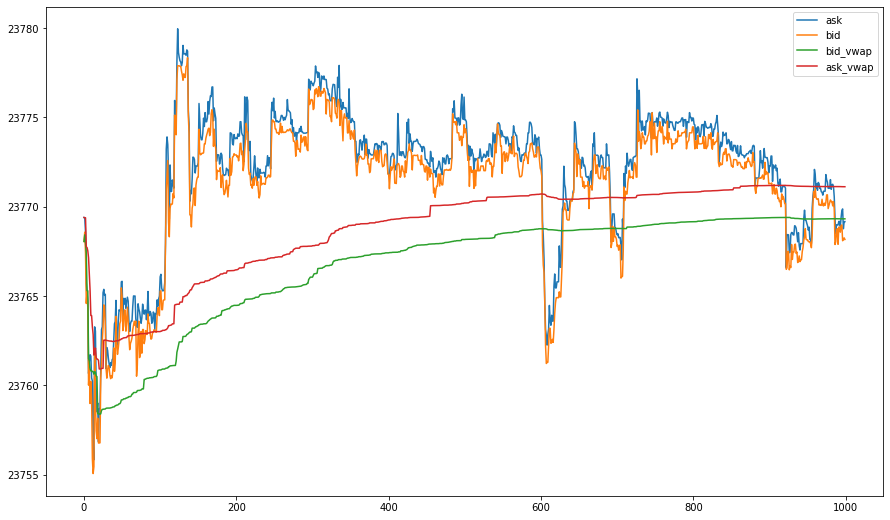

In [ ]:
df[["ask","bid","bid_vwap","ask_vwap"]].plot(figsize=(15,9))

In [ ]:
client.get_historical_trades(symbol="BTCUSDT")

BinanceAPIException: ignored

In [ ]:
symbol1="BTCUSDT"
symbol2="BTCBUSD"
data_1=[]
for i in range(100000):
  client = Client()
  depth1 = client.get_order_book(symbol=symbol1)
  depth2 = client.get_order_book(symbol=symbol2)

  ask1,bid1=depth1["asks"][:1][0][0],depth1["bids"][:1][0][0]
  ask2,bid2=depth2["asks"][:1][0][0],depth2["bids"][:1][0][0]
  ask_volume1,bid_volume1=depth1["asks"][:1][0][1],depth1["bids"][:1][0][1]
  ask_volume2,bid_volume2=depth2["asks"][:1][0][1],depth2["bids"][:1][0][1]
  data=[int(time.time()*1000),ask1,bid1,bid_volume1,ask_volume1,ask2,bid2,bid_volume2,ask_volume2]
  data_1.append(data)
  time.sleep(0.1)
#data_1
df=pd.DataFrame(data_1,columns=["timestamp","ask1","bid1","bid_volume1","ask_volume1","ask2","bid2","bid_volume2","ask_volume2"])
df["ask1"]=pd.to_numeric(df["ask1"])
df["bid1"]=pd.to_numeric(df["bid1"])
df["bid_volume1"]=pd.to_numeric(df["bid_volume1"])
df["ask_volume1"]=pd.to_numeric(df["ask_volume1"])
df["ask2"]=pd.to_numeric(df["ask2"])
df["bid2"]=pd.to_numeric(df["bid2"])
df["bid_volume2"]=pd.to_numeric(df["bid_volume2"])
df["ask_volume2"]=pd.to_numeric(df["ask_volume2"])
df["datetime"]=pd.to_datetime(df.timestamp,unit="ms")
df["mid1"]=(df["ask1"]+df["bid1"])
df["mid2"]=(df["ask2"]+df["bid2"])
df["spread_mid"]=df["mid2"]-df["mid1"]
df.to_csv("{}_{}_spread.csv".format(symbol1,symbol2))

KeyboardInterrupt: ignored

In [ ]:
df

,timestamp,ask1,bid1,bid_volume1,ask_volume1,ask2,bid2,bid_volume2,ask_volume2,datetime,mid1,mid2,spread_mid
0,1659267681702,23772.88,23772.56,0.23456,0.00419,23781.57,23779.45,0.02449,0.00105,2022-07-31 11:41:21.702,47545.44,47561.02,-15.58
1,1659267682087,23773.17,23772.29,0.02555,0.03813,23781.49,23779.45,0.02449,0.00061,2022-07-31 11:41:22.087,47545.46,47560.94,-15.48
2,1659267682450,23773.20,23773.17,0.03813,0.00045,23781.49,23779.45,0.02449,0.00061,2022-07-31 11:41:22.450,47546.37,47560.94,-14.57
3,1659267682968,23773.52,23773.30,0.04533,0.00054,23781.56,23779.45,0.02449,0.00061,2022-07-31 11:41:22.968,47546.82,47561.01,-14.19
4,1659267683324,23774.73,23773.57,0.03813,0.00200,23782.99,23779.50,0.04603,0.00050,2022-07-31 11:41:23.324,47548.30,47562.49,-14.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1659267718456,23760.69,23760.31,0.00145,0.00054,23769.05,23766.36,0.17700,0.03214,2022-07-31 11:41:58.456,47521.00,47535.41,-14.41
96,1659267718799,23760.88,23760.38,0.00050,0.00425,23769.04,23766.55,0.16500,0.00420,2022-07-31 11:41:58.799,47521.26,47535.59,-14.33
97,1659267719141,23760.88,23760.38,0.00050,0.00425,23769.04,23766.66,0.00062,0.00420,2022-07-31 11:41:59.141,47521.26,47535.70,-14.44
98,1659267719482,23760.35,23760.10,0.00200,0.01000,23769.33,23766.71,0.01030,0.00420,2022-07-31 11:41:59.482,47520.45,47536.04,-15.59
